<a href="https://colab.research.google.com/github/nehaljain21/Polynomial-Regression/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
uploaded=files.upload()
df=pd.read_csv("Ice_cream_selling_data.csv")

Saving Ice_cream_selling_data.csv to Ice_cream_selling_data (2).csv


In [ ]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [ ]:
df.shape

(49, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [ ]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [ ]:
df.isna().sum()

,0
Temperature (°C),0
Ice Cream Sales (units),0


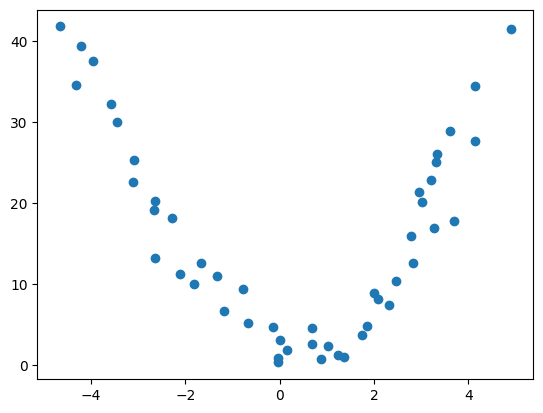

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["Temperature (°C)"], df["Ice Cream Sales (units)"])

In [ ]:
x=df[["Temperature (°C)"]]
y=df[["Ice Cream Sales (units)"]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=15)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.005435931989663301


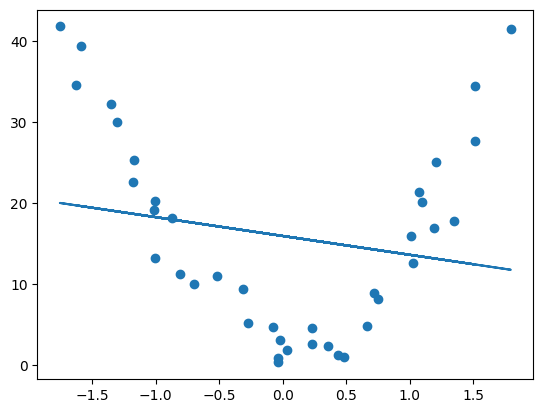

In [ ]:
plt.scatter(x_train_scaled, y_train)
plt.plot(x_train_scaled, lr.predict(x_train_scaled))
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [ ]:
x_train_scaled_1= scaler.fit_transform(x_train_poly)
x_test_scaled_1 = scaler.transform(x_test_poly)

In [ ]:
lr = LinearRegression()
lr.fit(x_train_scaled_1, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test_scaled_1)

In [ ]:
r2_score(y_test, y_pred)

0.8946657844069429

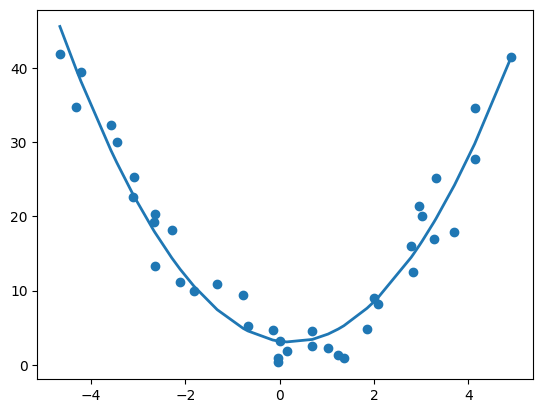

In [ ]:
import numpy as np
x_sorted = np.sort(x_train.values.flatten()).reshape(-1, 1)
x_sorted_df = pd.DataFrame(x_sorted, columns=["Temperature (°C)"])
x_sorted_poly = poly.transform(x_sorted_df)
x_sorted_scaled = scaler.transform(x_sorted_poly)
y_sorted_pred = lr.predict(x_sorted_scaled)
plt.scatter(x_train, y_train)
plt.plot(x_sorted, y_sorted_pred, linewidth=2)
plt.show()
